# Zomato Restaurant Project

<b>Problem Statement:</b><br>
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

<b>Data Storage:</b><br>
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

- Country code
- Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurants location
- Latitude: Latitude coordinate of the restaurants location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people
    
Problem statement : In this dataset predict 2 things –

1. Average Cost for two
2. Price range

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets Downlaod Files: https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin-1')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
df_country = pd.read_excel(r"Downloads\Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
data=pd.merge(df1,df_country,on='Country Code',how='left')

In [7]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
data.shape

(9551, 22)

# Droping Duplicates

In [9]:
data.drop_duplicates()
data.shape

(9551, 22)

No duplicate values are present in the dataset.

# Checking Unique values

In [10]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

# Exploratory Data Analysis

# Checking Null Values

In [11]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

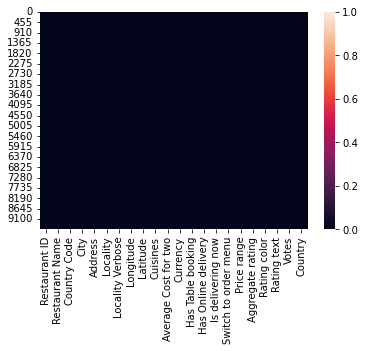

In [12]:
# visualising null values in dataset
sns.heatmap(data.isnull())

No Null values are present in the dataset.

# Univariate Analysis

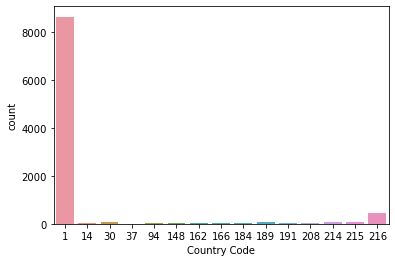

In [13]:
sns.countplot(x='Country Code',data=data)
plt.show()

Whose are having 1 as country code they are having more count.

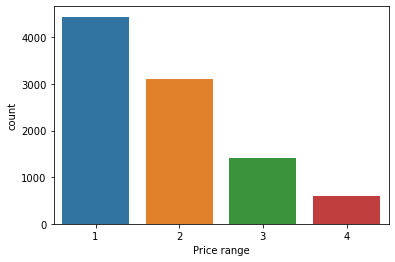

In [14]:
sns.countplot(x='Price range',data=data)
plt.show()

We can see, Price range of 1 has maximum price range followed by 2. All Price range are decreasing in order.

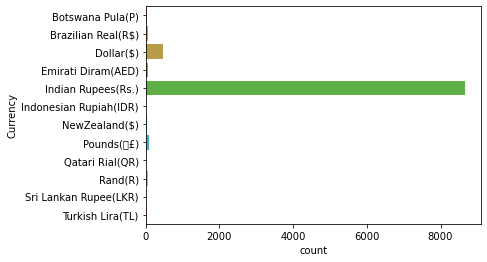

In [15]:
sns.countplot(y='Currency',data=data)
plt.show()

We can see, Indian Rupees is most used currecny. It means that zomato has main business in India followed by Dollar.

Remaining all has no such used, it means zomato not functioning in that country as zomato does in India.

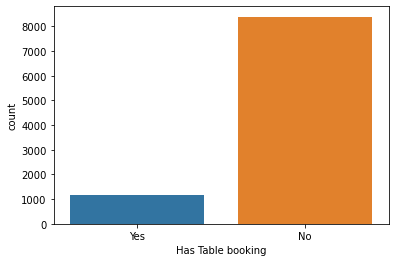

In [16]:
sns.countplot(x='Has Table booking',data=data)
plt.show()

We can see, Zomato has not provivded the table booking. But in some place it provided table booking. May be their zomaato own its Restaurant.

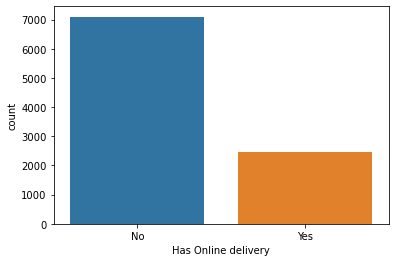

In [17]:
sns.countplot(x='Has Online delivery',data=data)
plt.show()

Most of places has no online delivery available. But in few places has availabled online delivery.

In [18]:
## Which countries do have online deliveries option
a=data[data['Has Online delivery']=='Yes'].Country.value_counts()

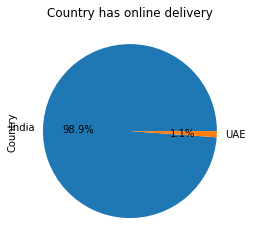

In [19]:
a.plot.pie(autopct = '%1.1f%%')
plt.title('Country has online delivery')
plt.show()

we can see, India has 98.9% online delivery available but UAE has only 1.1% online delivery.

But rest of all countries haven't online deliovery.

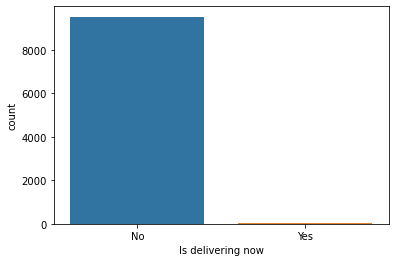

In [20]:
sns.countplot(x='Is delivering now',data=data)
plt.show()

Most of the places has not availavel delivery Now system.

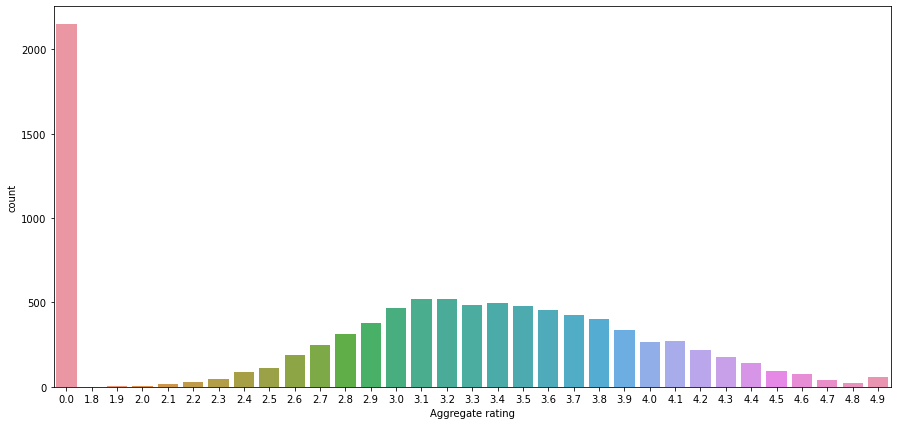

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=data)
plt.show()

---> Most of the coustomer has gives 0 aggregate rating than others.<br>
---> 3.1 and 3.2 is most given rating after a 0 aggregate rating.

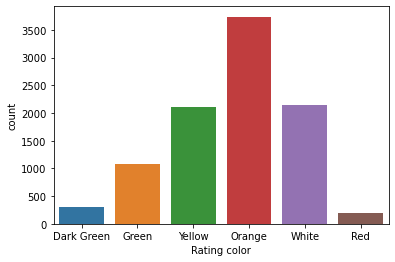

In [22]:
sns.countplot(x='Rating color',data=data,)
plt.show()

- We can see, orange is most used color for rating followed by white.
- Red color are less used for rating. It means no one dislike the food delivered by zomato.

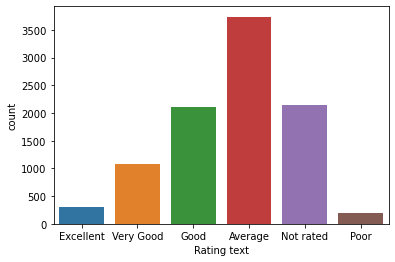

In [23]:
sns.countplot(x='Rating text',data=data,)
plt.show()

In rating text, Average is the most used test followed by good.<br>
But some of customer are not rated the zomato service.<br>
Very few customers gives poor rating.

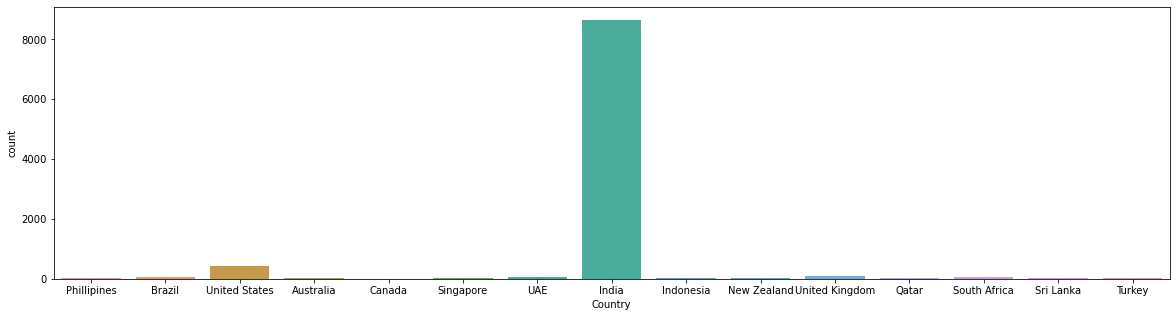

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=data)
plt.show()

- As we observed before that Indian currency is most used. It because of in India is the most of Zomato businees do followed by USA.
- Rest of all counteries zomato not gives service as in India they gives.

In [25]:
city_values = data.City.value_counts().values
city_labels = data.City.value_counts().index

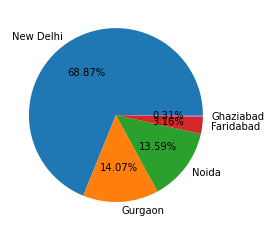

In [26]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

- 68.7% zomato works in New Delhi foolowed by Gurgaon.
- In this we can observed here these cities are comes in Delhi NCR Region. It means that zomato mostly works in Delhi NCR region.

In [27]:
# Find top 10 Cuisine
cuisin_val=data.Cuisines.value_counts().values
cuisin_label = data.Cuisines.value_counts().index

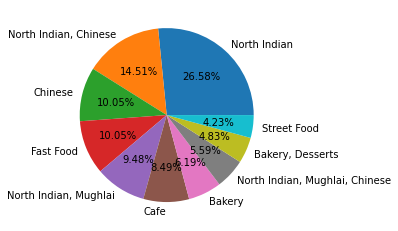

In [28]:
plt.pie(cuisin_val[:10],labels=cuisin_label[:10],autopct='%1.2f%%')
plt.show()

- We can see, 26.58% people or customers like to eat north Indian cuisine followed by Chinese.
- These are the top 10 Cuisine like by customes.

In [29]:
# Find top 10 location
val=data.Locality.value_counts().values
label = data.Locality.value_counts().index

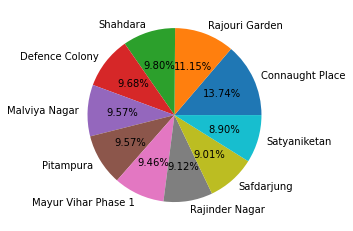

In [30]:
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.show()

- These are the top 10 place where most of zomato allines restaurant are located.
- In which Connaught Place is top among the others it has 13.74% restaurant in it place followed by Rajouri Graden.

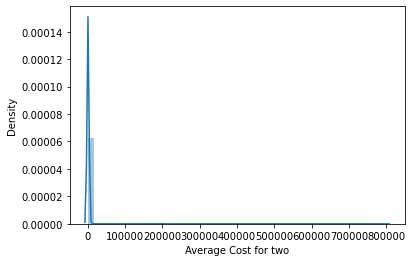

In [31]:
sns.distplot(data['Average Cost for two'])
plt.show()

We can see 50% restaurand are affortable.

# Bivariate Analysis

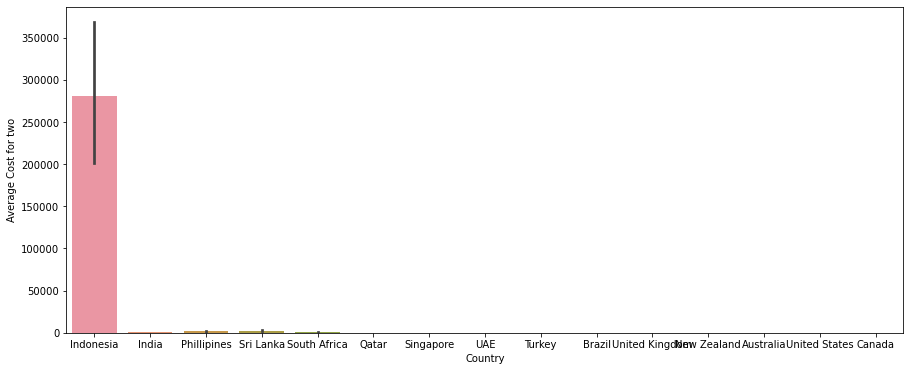

In [32]:
plt.figure(figsize=(15,6))
df_good = data.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="Country",y="Average Cost for two",data=df_good)
plt.show()

- We can see, Indonesia has high Average cost for two. It means that Indonesia has high cost of foos than others.
- Rest of all having low avwerage cost for two.

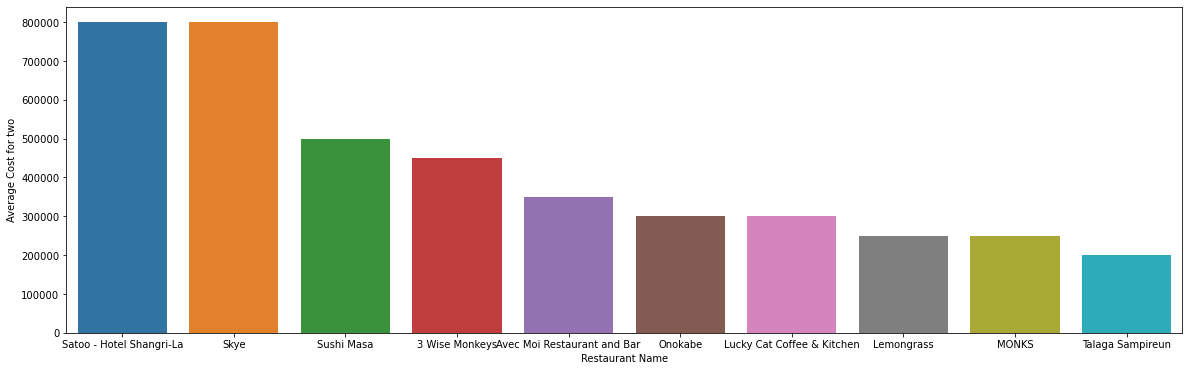

In [33]:
plt.figure(figsize=(20,6))
df_good = data.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(x="Restaurant Name",y="Average Cost for two",data=df_good)
plt.show()

- These are the top 10 restaurant name where average cost for two is low than others.
- In which Satoo hotel has high average cost for two followed by Skye.

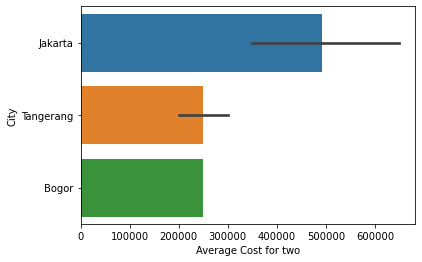

In [34]:
df_good = data.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(y="City",x="Average Cost for two",data=df_good)
plt.show()

These are top cities where has high average cost for two in which Jakartha is in to followed bt Tangerang.

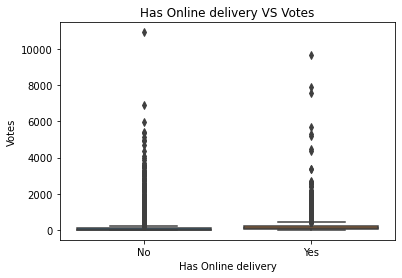

In [35]:
sns.boxplot(x='Has Online delivery',y='Votes',data=data)
plt.title('Has Online delivery VS Votes')
plt.show()

- Yes,you can observe that median number of votes for both categories vary.
- Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.

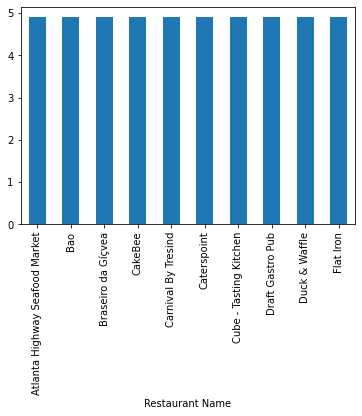

In [36]:
data.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10).plot.bar()
plt.show()

- These are the top 10 restaurant name where most of the coustomers gives good aggregate rating.
- In which Atlanta is top among the others.

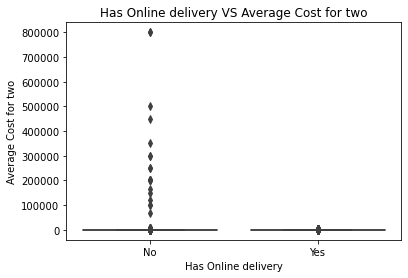

In [37]:
sns.boxplot(x='Has Online delivery',y='Average Cost for two',data=data)
plt.title('Has Online delivery VS Average Cost for two')
plt.show()

Average cost for two has not affected by online delivery system.

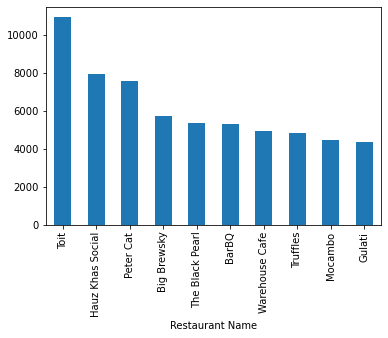

In [38]:
data.groupby('Restaurant Name')['Votes'].mean().nlargest(10).plot.bar()
plt.show()

- We can see, top 10 reaturant on basis of the customers votes.
- Toit is top restaurant top among the others whose have top votes followed by Hauz Khans.

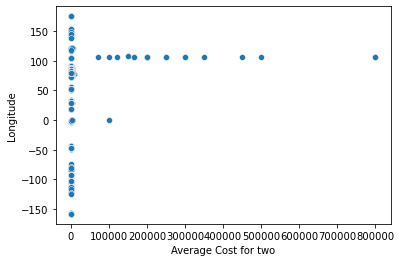

In [39]:
sns.scatterplot(x='Average Cost for two',y='Longitude',data=data)
plt.show()

- It does not have any linear correlation of both features.
- Most of the restaurant are above the 50 Longitute.

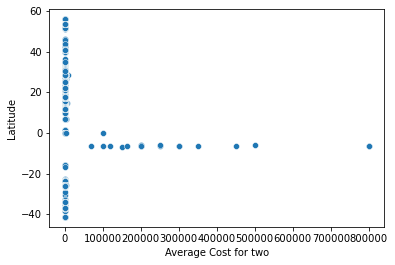

In [40]:
sns.scatterplot(x='Average Cost for two',y='Latitude',data=data)
plt.show()

We can see, both feature is not have nay linear relationship with each others.

In [41]:
rating=data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

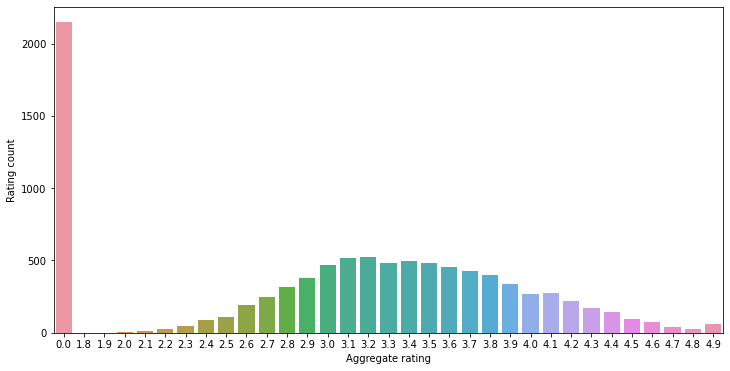

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',data=rating)
plt.show()

- When rating is between 4.5 to 4.9-----> Excellent
- When rating is between 4.0 to 3.4-----> Very good
- When rating is between 3.5 to 3.9-----> Good
- When rating is between 2.5 to 2.9-----> Average
- When rating is between 2.0 to 2.4-----> Poor
- And 0 rating given by many people

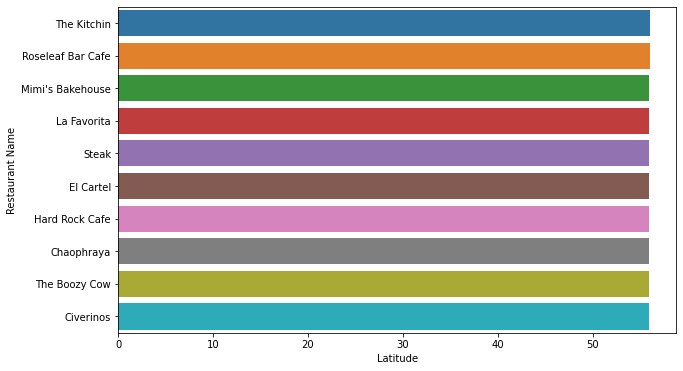

In [43]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="Latitude",ascending=False).iloc[0:10,:]
sns.barplot(y="Restaurant Name",x="Latitude",data=df_good)
plt.show()

- We can see, by latitude The Kitchen has highest latitude. It mean at high latitude criteria, it is top.
- We can see, all top 10 restaurant name, where they are generaly lies in nearly same latitude.

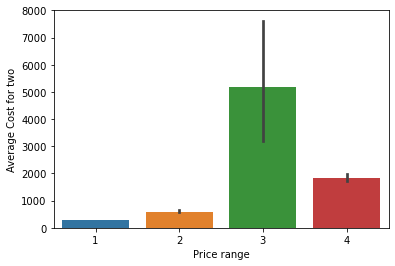

In [44]:
sns.barplot(x='Price range',y='Average Cost for two',data=data)
plt.show()

- Many restaurant are having as price range 3 it means that those are also having high average price range.
- It may have directly proportional to each others.

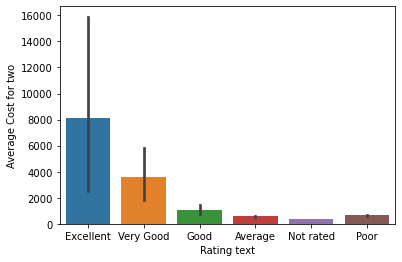

In [45]:
sns.barplot(x='Rating text',y='Average Cost for two',data=data)
plt.show()

- Whose having as rating text Excellent those restaurant are having high average cost for two.
- According to rating test average coat for to is depend.

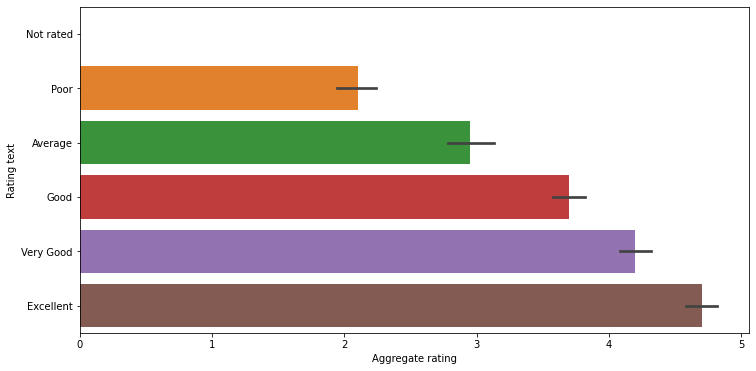

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating text',data=rating)
plt.show()

- We can see, Many restaurant are having Excellent as rating text and their Aggrege=ate rating also high it mean more than 4.5.
- Similarly, Rating text is depending upon the aggregate rating. Whose are having good rating thier rating text also good.

In [47]:
# Find the countrries name that has given 0 rating
data[data['Rating color']=='White'].groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


- We can see, most of the Indian customers are gives the 0 rating.
- It means that may be service is bad or customers are not intresting in gives any rating.

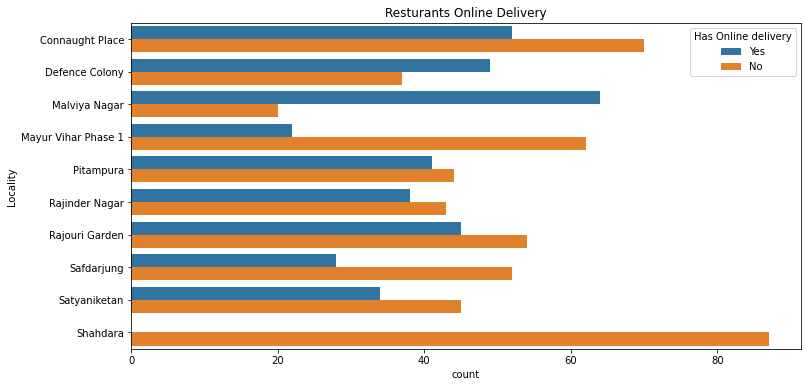

In [48]:
Delhi = data[(data.City == 'New Delhi')]
top_locality = Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')
plt.show()

- We can see, most of the place has no online delivery option. or online order system.
- But Malviya Nagar is top among the restaurant whose having online ordered or online delivery.

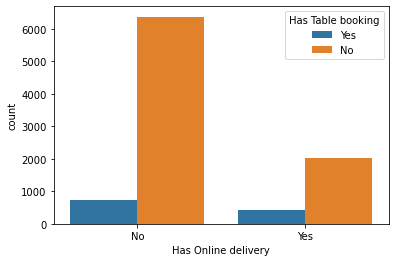

In [49]:
sns.countplot(x='Has Online delivery',hue='Has Table booking',data=data)
plt.show()

We can see, those are not providing online delivery they also have less table booking but it doe not have any impact on business because most of the restaurant has not provided online delivery.

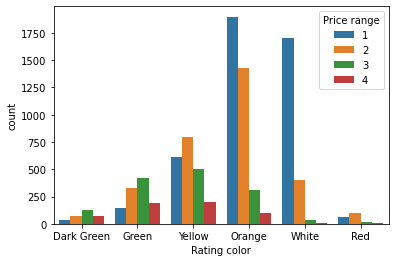

In [50]:
sns.countplot(x='Rating color',hue='Price range',data=data)
plt.show()

We can see, As per price range the rating color has change. In Which the Orange rating color has more count than others.

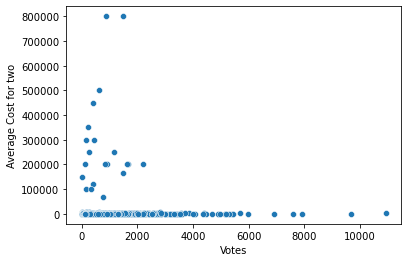

In [51]:
sns.scatterplot(x='Votes',y='Average Cost for two',data=data)
plt.show()

- Votes has no linear relationship with Average cost for two.
- But upto 2000 Votes Average cost has some linear relationship with votes.

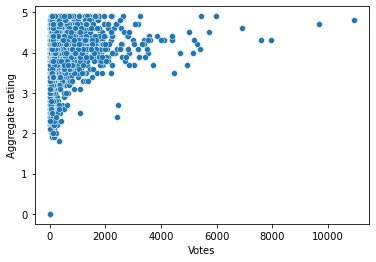

In [52]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=data)
plt.show()

- There is no direct linear relationship with each others.
- But After 2 rating there is little linear relationship.

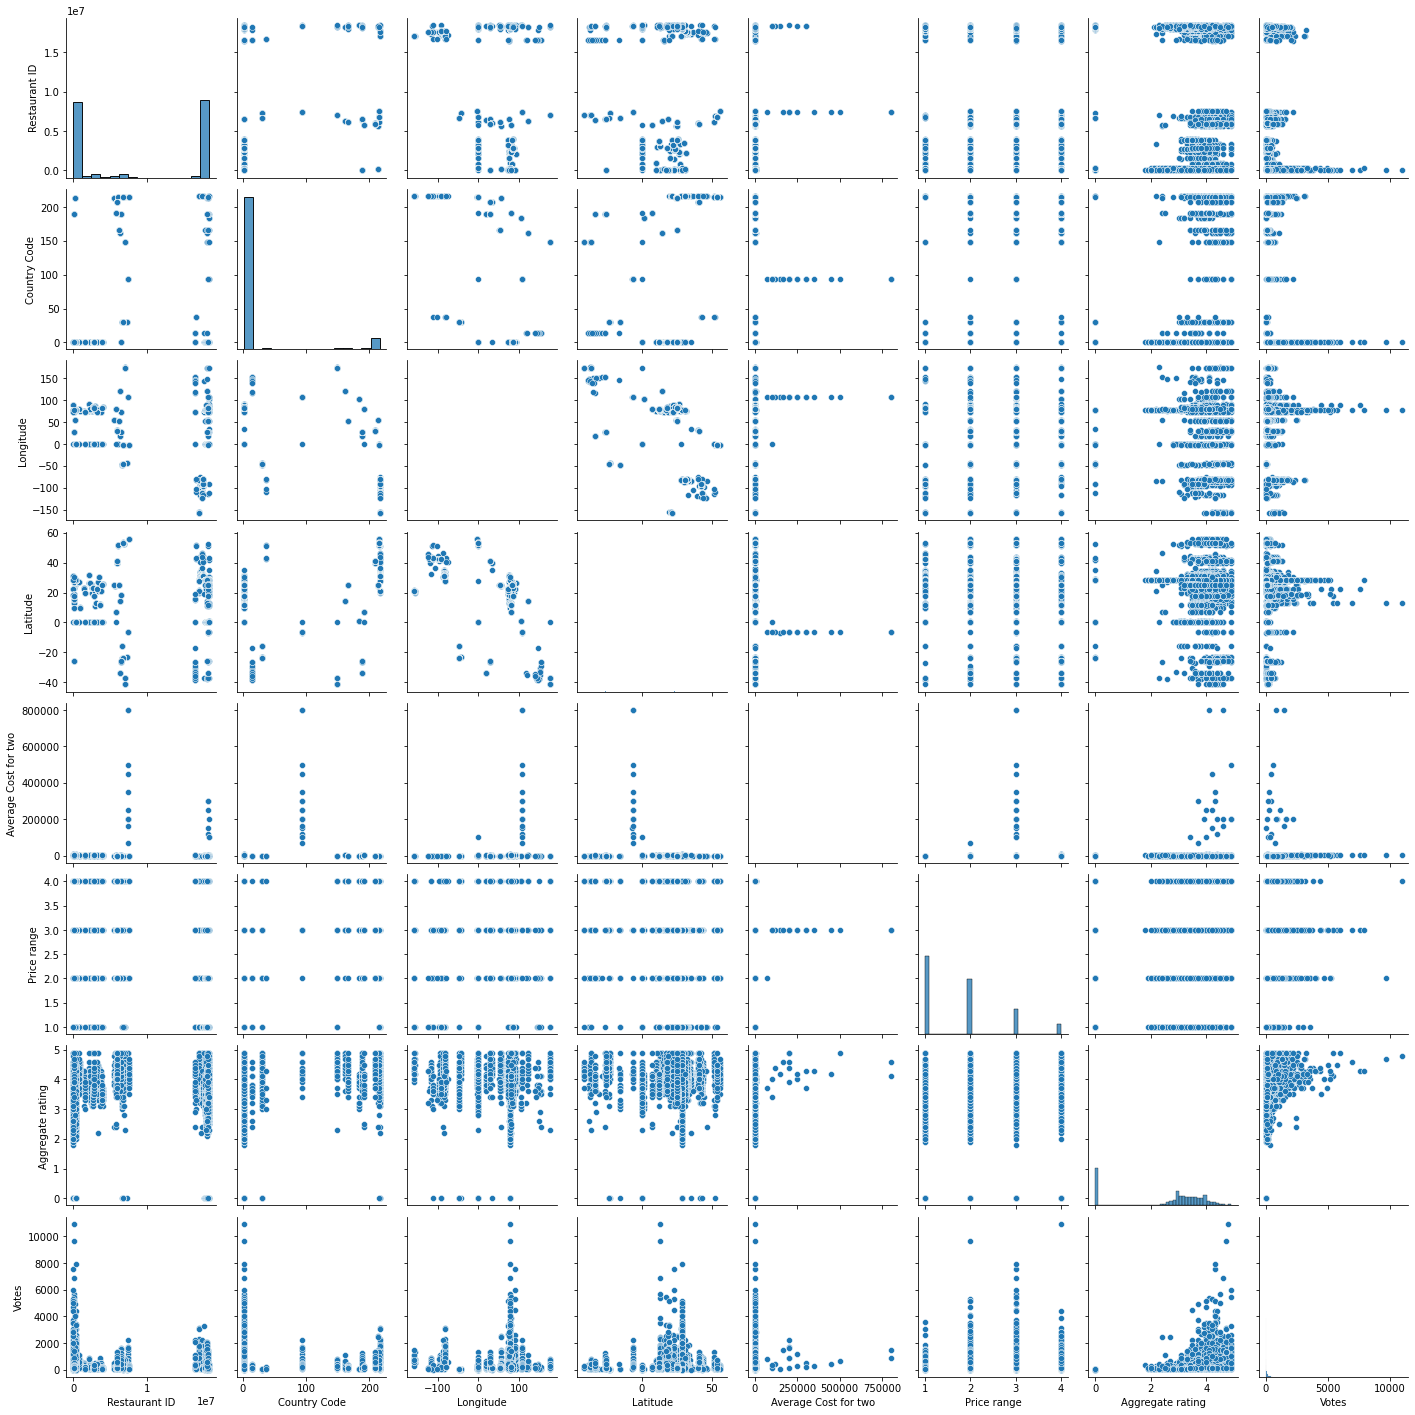

In [53]:
sns.pairplot(data)

# Encoding

In [54]:
data.drop(columns=['Restaurant ID','Locality Verbose'],axis=1,inplace=True)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

In [57]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

In [58]:
data.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


# Summary Statistics

In [59]:
data.describe()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


<b>Observation:</b>
- Difference between 75% and max in Average Cost for two, Evaporation and Votes is high, columns is considerable indicating presence of outliers.
- In some features Mean to Standrad of deviation difference is close.
- In Average cost for two has mean and std difference is more.

# Correlation of the features with target column

In [60]:
data.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Is delivering now      -0.001862
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

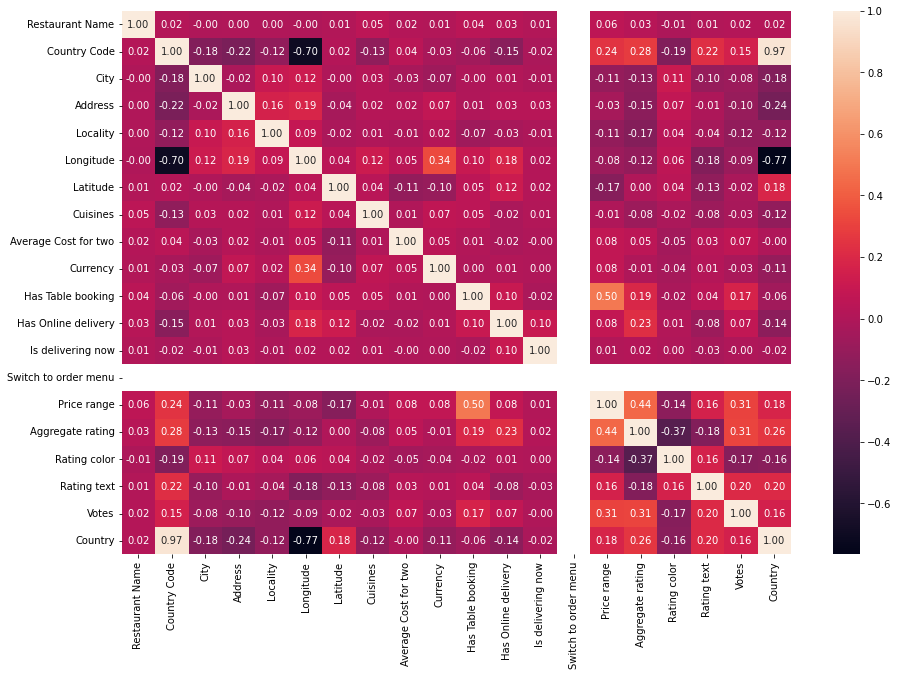

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

<b>Outcome of Correlation</b>
- Price range has 8% positive correlation with target column.
- Votes has 7% positive correlation with target column.

<b>Features correlation to each other</b>
- Country code has 97% positive correlation with country.
- Longitude has 77% negative correlation with country.
- Has Table Booking has 50% positive correlation with Price range.
- Price range has 44% positive correlation with Aggregate rating.
- Country code has 77% positive correlation with Longitude.

# Skewness

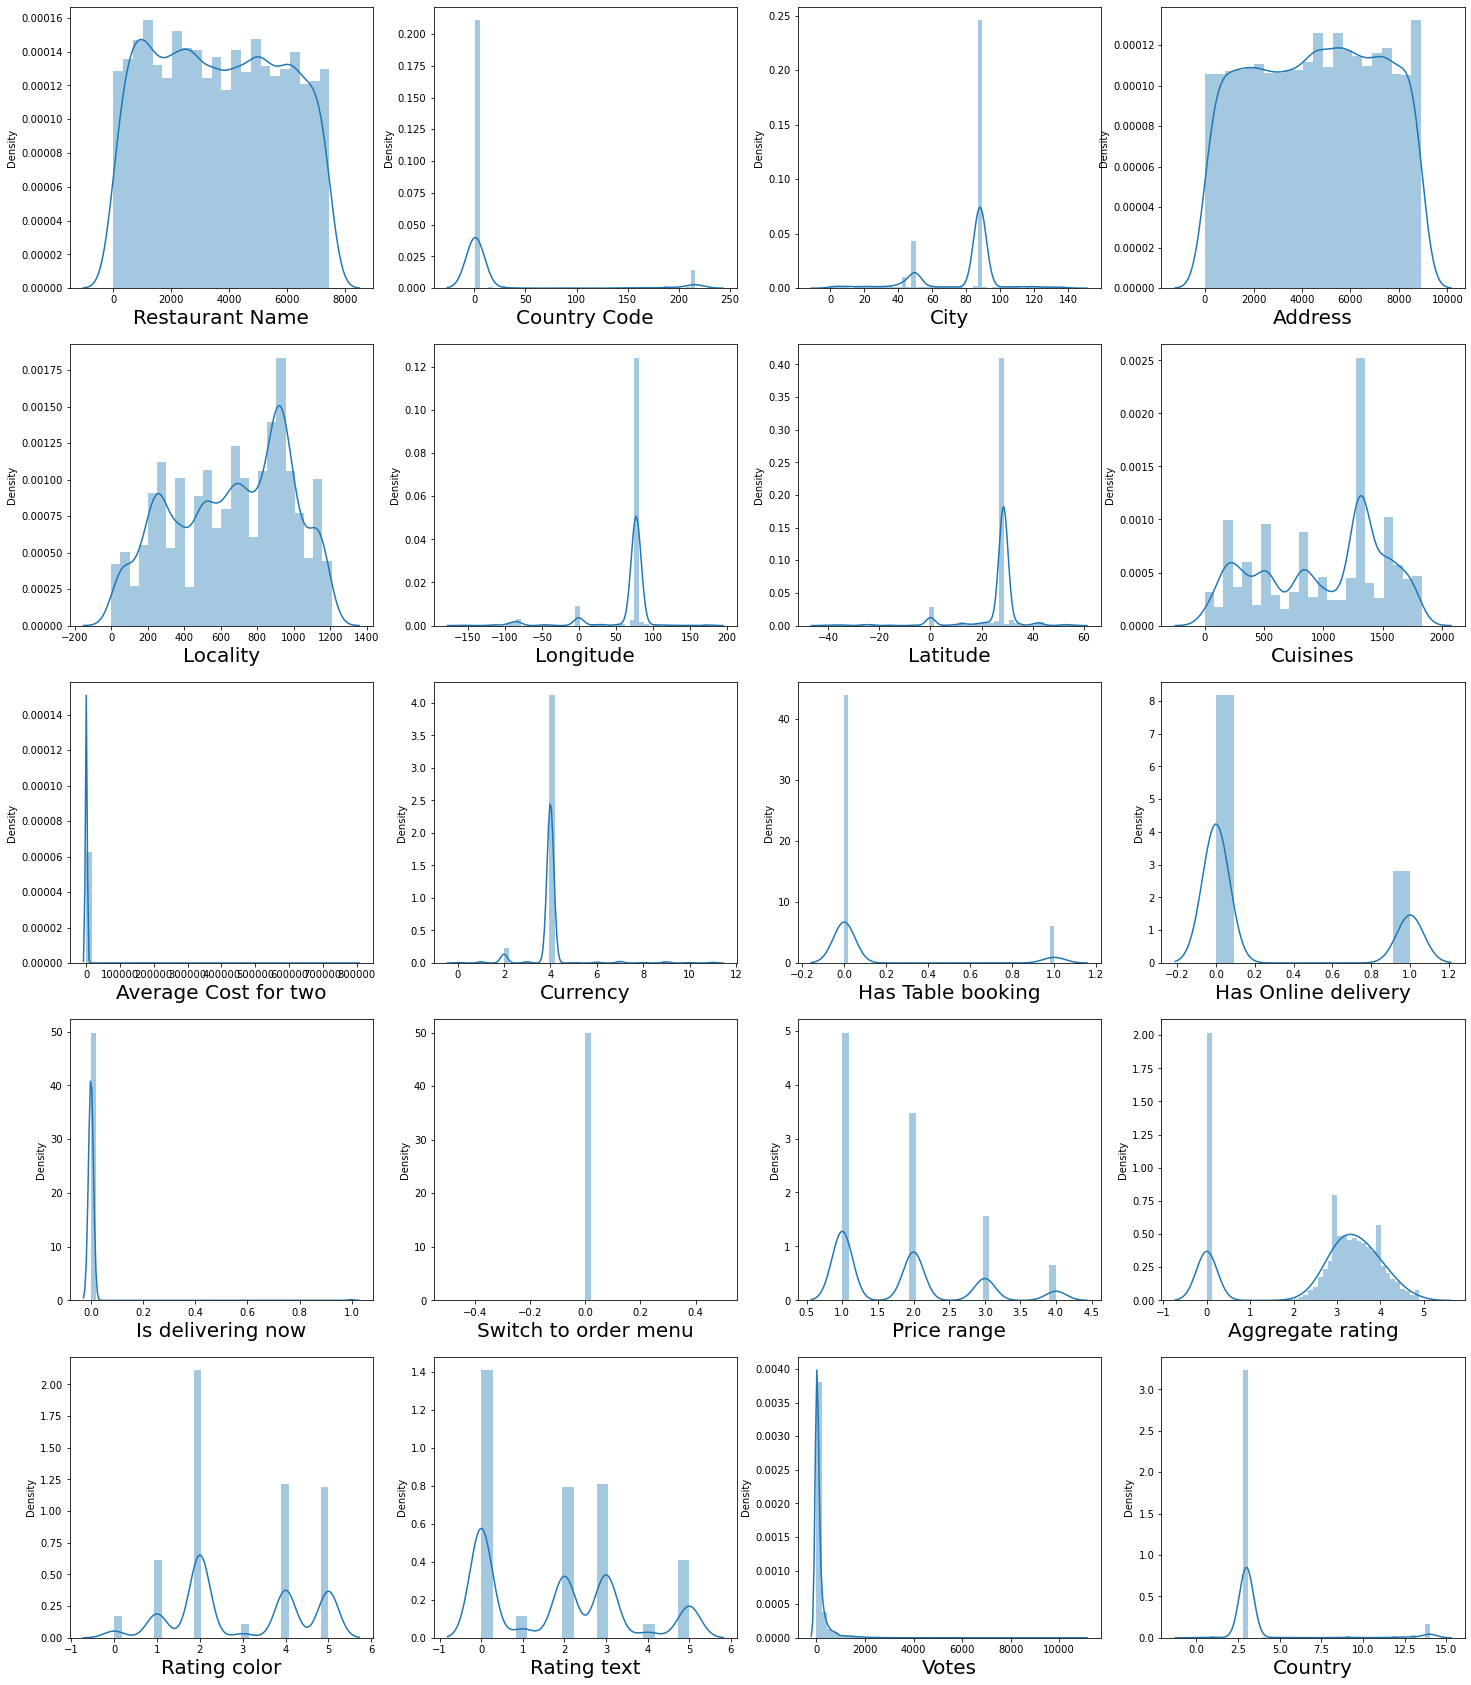

In [62]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- All features are having some skewness.
- Average cost for two and votes are seem to be present a outliers.

In [63]:
data.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Almost all features are having some skewness.

# Checking Outliers

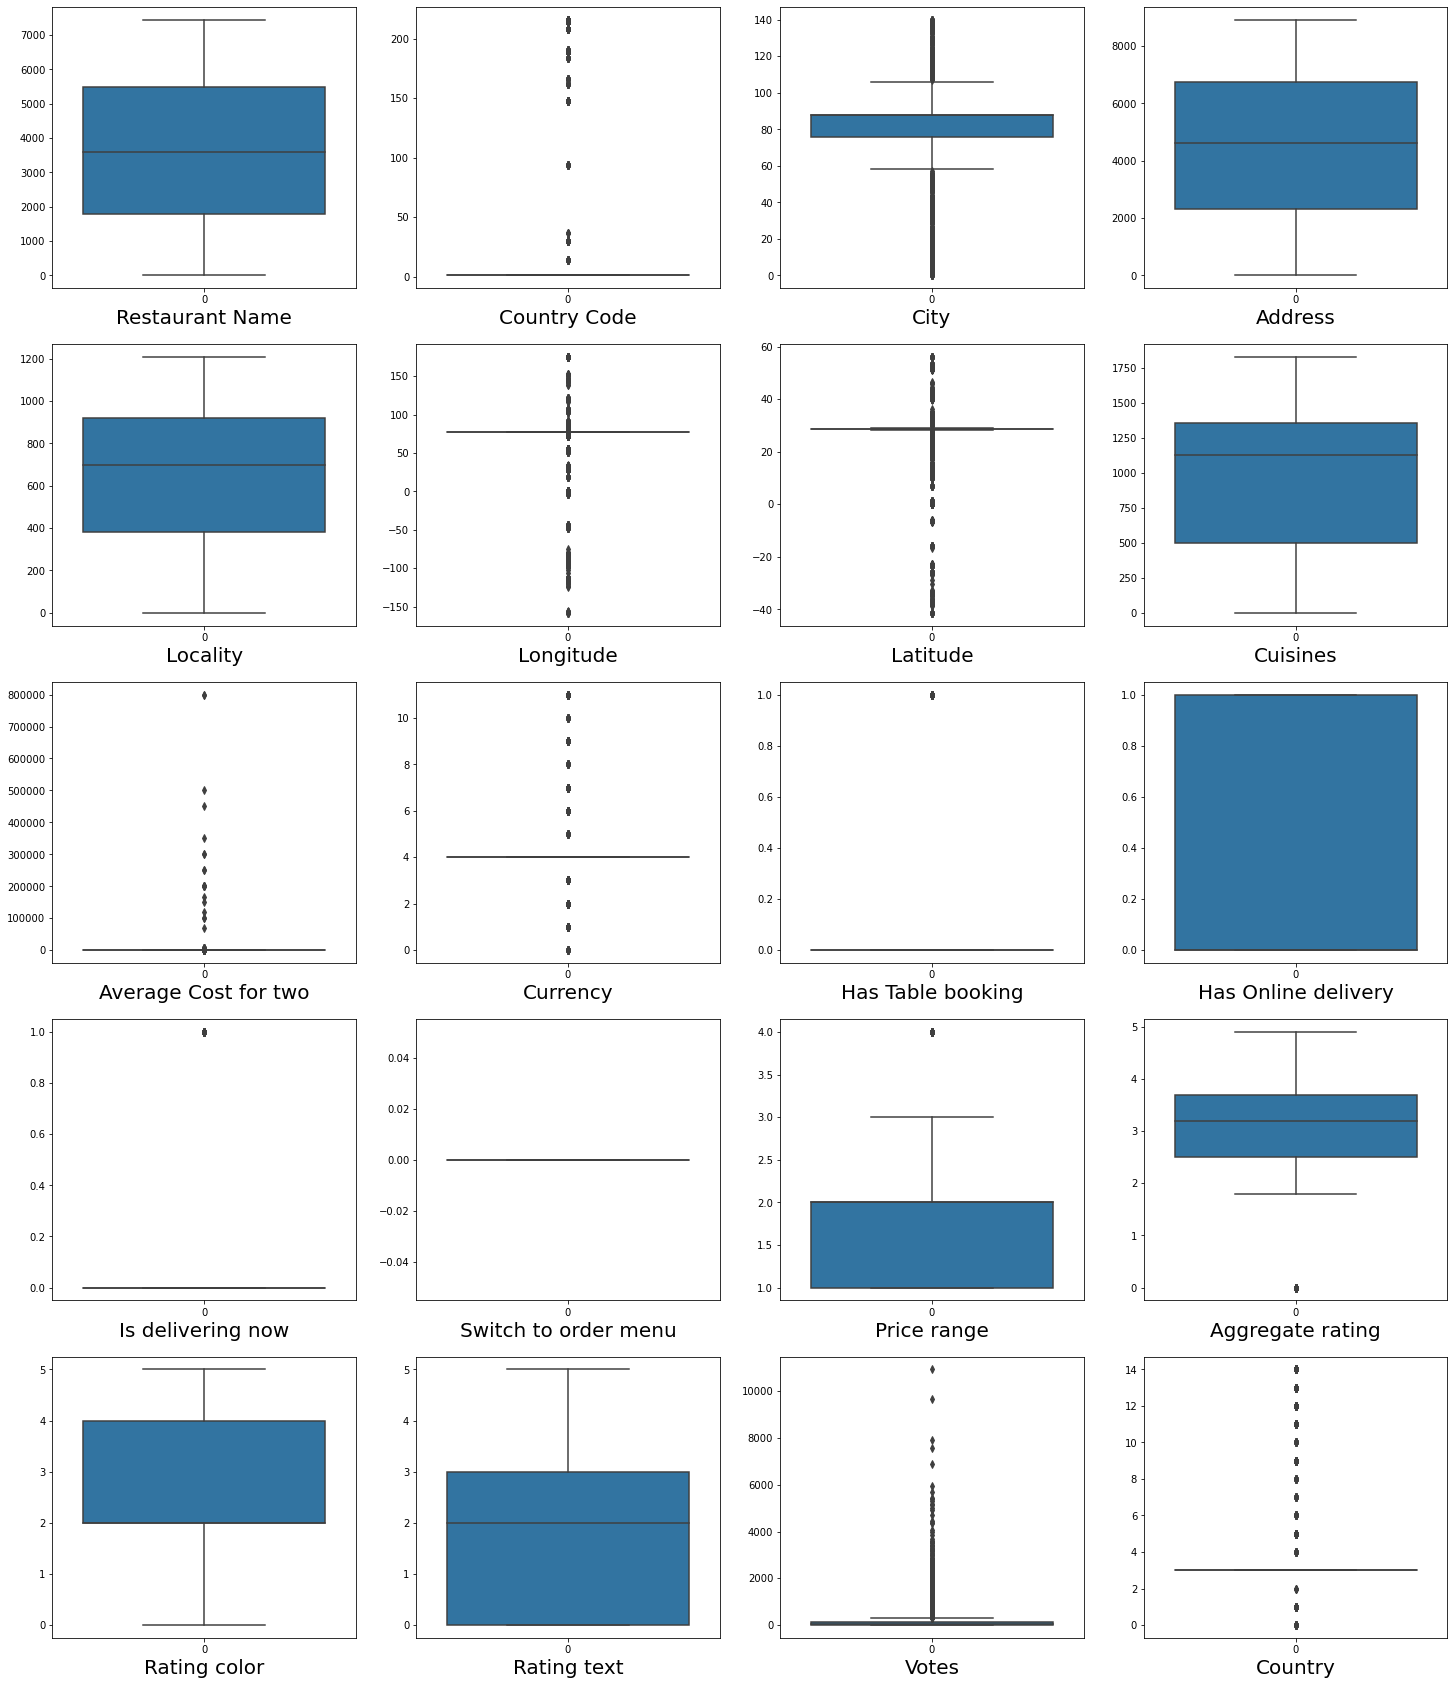

In [64]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=20:
        plt.subplot(5,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- Restaurant Name, Address, Rating color, Rating text, Has online delivery, Cuisine and Locality are not having Outliers.
- Some feature are having outliers but those are categorical features.

In [65]:
from scipy.stats import zscore

z_score = zscore(data[['Average Cost for two','Votes']]) # Only removing outliers from continuous data
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

In [66]:
df.shape

(9362, 20)

In [67]:
data.shape

(9551, 20)

In [68]:
dataloss=(9551-9362)/9551*100
dataloss

1.978850382158936

# Splitting data into two parts: Input and Target Variable

In [73]:
X = df.drop(columns=['Average Cost for two'],axis=1)
Y = df['Average Cost for two']

In [74]:
X.shape

(9362, 19)

In [75]:
Y.shape

(9362,)

# Scaling

In [76]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046028,2.546808,-0.234817,1.608777,-1.556831,1.377696,-1.034966,-0.135805,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.359625,1.429678,-2.022410,-0.451916,0.977930,0.859957
1,-0.223104,2.546808,-0.234817,0.584353,-0.216997,1.377371,-1.036033,0.235153,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.359625,1.231562,-2.022410,-0.451916,2.321890,0.859957
2,-0.352063,2.546808,-0.148206,0.050327,-1.121862,1.378405,-1.033513,1.322778,-4.331413,2.746265,-0.586149,-0.060373,0.0,2.476579,1.165524,-1.343779,1.932324,0.764449,0.859957
3,0.493647,2.546808,-0.148206,1.610725,0.637068,1.378396,-1.033157,0.264286,-4.331413,-0.364131,-0.586149,-0.060373,0.0,2.476579,1.495717,-2.022410,-0.451916,1.225374,0.859957
4,0.874917,2.546808,-0.148206,1.610335,0.637068,1.378421,-1.033236,0.256517,-4.331413,2.746265,-0.586149,-0.060373,0.0,2.476579,1.429678,-2.022410,-0.451916,0.565523,0.859957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,0.370294,3.360908,2.666651,0.534105,-0.458294,-0.848838,1.372615,1.598569,7.644251,-0.364131,-0.586149,-0.060373,0.0,1.359625,0.967408,-1.343779,1.932324,3.277703,2.753221
9358,-1.093111,3.360908,2.666651,0.548128,-0.347171,-0.847293,1.371437,1.619933,7.644251,-0.364131,-0.586149,-0.060373,0.0,1.359625,1.033446,-1.343779,1.932324,4.471256,2.753221
9359,-0.271698,3.360908,2.666651,0.549686,-0.340821,-0.847454,1.375620,0.233211,7.644251,-0.364131,-0.586149,-0.060373,0.0,2.476579,0.703253,1.370745,0.144144,2.661519,2.753221
9360,-1.465971,3.360908,2.666651,0.550075,-0.340821,-0.847420,1.375817,1.295587,7.644251,-0.364131,-0.586149,-0.060373,0.0,2.476579,0.901369,-1.343779,1.932324,3.825961,2.753221


In [77]:
# Checking VIF after scaling the data.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.008700,Restaurant Name
1,48.278786,Country Code
2,1.081831,City
3,1.106130,Address
4,1.068078,Locality
5,5.031289,Longitude
6,3.037873,Latitude
7,1.043922,Cuisines
8,1.294013,Currency
9,1.482431,Has Table booking


In [78]:
# Dropping high Mulicollinarity column
X.drop("Country Code",axis=1,inplace=True)
X.drop("Switch to order menu",axis=1,inplace=True)
X.drop("Country",axis=1,inplace=True)

# Selecting Kbest Features

In [79]:
from sklearn.feature_selection import SelectKBest, f_classif

In [80]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [81]:
fit = bestfeat.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                Feature       Score
11          Price range  418.202989
4             Longitude  142.353602
8     Has Table booking   80.635590
7              Currency   29.041295
15                Votes   25.818126
12     Aggregate rating   22.275744
5              Latitude   15.805349
9   Has Online delivery   11.752010
2               Address    7.795143
14          Rating text    7.144425
1                  City    4.863372
13         Rating color    4.044857
6              Cuisines    3.786064
3              Locality    3.379470
10    Is delivering now    2.063234
0       Restaurant Name    1.358221


<b>Selecting best features based on their scores</b>

In [82]:
x_best = X.drop(columns=['Restaurant Name','Is delivering now']).copy()

<b>Data Skeweness After Removing Skewness</b>

In [83]:
from sklearn.preprocessing import power_transform
X = power_transform(x_best,method='yeo-johnson')

In [84]:
trans=pd.DataFrame(X)

In [85]:
trans.skew()

0     0.532634
1    -0.007737
2    -0.037826
3     2.219168
4     1.349365
5    -0.060454
6    -0.164795
7     2.382516
8     1.120081
9     0.269597
10   -0.080241
11   -0.022619
12    0.147742
13    0.620989
dtype: float64

In [86]:
X = scaler.fit_transform(X)
X

array([[-0.45791111,  1.63425957, -1.46491506, ..., -2.12130967,
        -0.36190373,  1.60852326],
       [-0.45791111,  0.57431718, -0.30523529, ..., -2.12130967,
        -0.36190373,  1.85982752],
       [-0.37255884,  0.03345568, -1.1105559 , ..., -1.37386837,
         1.70903651,  1.52323367],
       ...,
       [ 4.75917515,  0.53891262, -0.42263097, ...,  1.3436892 ,
         0.27815177,  1.88948955],
       [ 4.75917515,  0.53931022, -0.42263097, ..., -1.37386837,
         1.70903651,  1.95421611],
       [ 4.75917515, -0.13228299, -0.06407726, ..., -1.37386837,
         1.70903651,  1.85982752]])

# Regression

<b>Finding the best random state</b>

In [87]:
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5770024222072097  on Random_state  16


# Creating train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)

In [88]:
X_train.shape

(6553, 14)

In [89]:
X_test.shape

(2809, 14)

In [90]:
Y_train.shape

(6553,)

In [91]:
Y_test.shape

(2809,)

# Linear Regression

In [92]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)
print('R2_score:',r2_score(Y_test,predLR))
print('MAE:',metrics.mean_absolute_error(Y_test, predLR))
print('MSE:',metrics.mean_squared_error(Y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predLR)))

R2_score: 0.5613356339452551
MAE: 208.60556599071262
MSE: 126454.74050236189
RMSE: 355.6047532055244


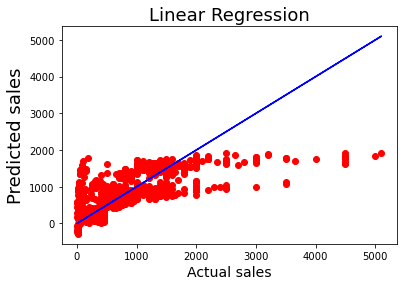

In [93]:
plt.scatter(x=Y_test, y=predLR, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# DecisionTree Regressor

In [94]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
preddtr=DTR.predict(X_test)
print('R2_score:',r2_score(Y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(Y_test, preddtr))
print('MSE:',metrics.mean_squared_error(Y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, preddtr)))

R2_score: 0.7172226546905902
MAE: 132.02705589177643
MSE: 81516.84656461375
RMSE: 285.511552418836


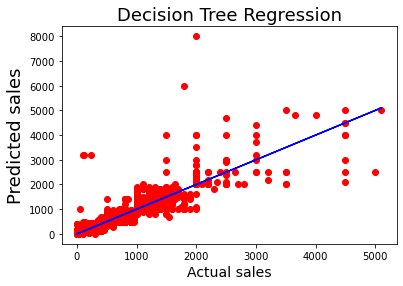

In [95]:
plt.scatter(x=Y_test, y=preddtr, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Decision Tree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# KNeighbors Regressor

In [96]:
KNR=KNeighborsRegressor()
KNR.fit(X_train,Y_train)
predknr=KNR.predict(X_test)
print('R2_score:',r2_score(Y_test,predknr))
print('MAE:',metrics.mean_absolute_error(Y_test, predknr))
print('MSE:',metrics.mean_squared_error(Y_test, predknr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predknr)))

R2_score: 0.7274006550292278
MAE: 151.47796368814525
MSE: 78582.8120469918
RMSE: 280.32626000250457


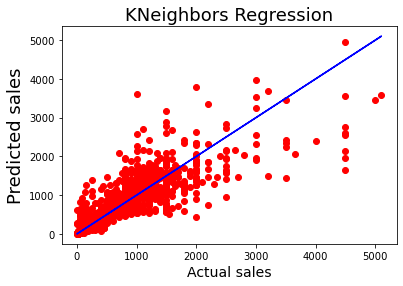

In [97]:
plt.scatter(x=Y_test, y=predknr, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNeighbors Regression', fontsize=18)
plt.savefig('knr.png')
plt.show()

# Support Vector Regressor

In [98]:
svr=SVR()
svr.fit(X_train,Y_train)
predsvr=svr.predict(X_test)
print('R2_score:',r2_score(Y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(Y_test, predsvr))
print('MSE:',metrics.mean_squared_error(Y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predsvr)))

R2_score: 0.2705341655278881
MAE: 235.17556433433663
MSE: 210284.7186634662
RMSE: 458.56811780090663


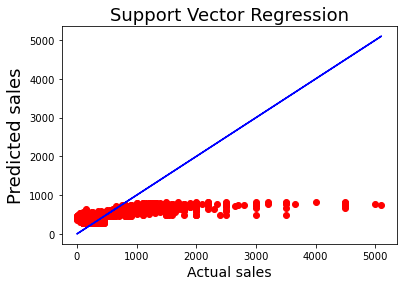

In [99]:
plt.scatter(x=Y_test, y=predsvr, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Support Vector Regression', fontsize=18)
plt.savefig('svr.png')
plt.show()

# Lasso Regressor

In [100]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [101]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(Y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))

R2_Score: 0.5619115598742974
MAE: 207.92424518374733
MSE: 126288.71706954781
RMSE: 355.37123838255087


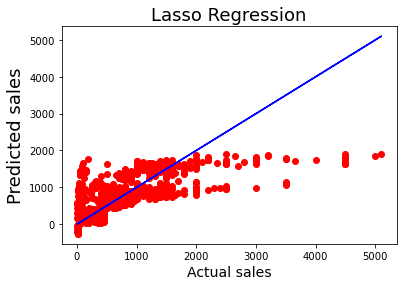

In [102]:
plt.scatter(x=Y_test, y=pred_lasso, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Lasso Regression', fontsize=18)
plt.savefig('lasso.png')
plt.show()

# Ridge Regressor

In [103]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [104]:
ridge=Ridge(alpha=10,solver='lsqr')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge=ridge.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(Y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))

R2_Score: 0.5614253027245436
MAE: 208.50325246933474
MSE: 126428.89148636346
RMSE: 355.56840619824965


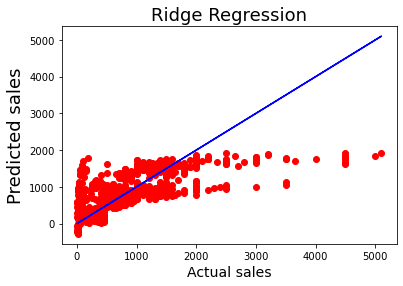

In [105]:
plt.scatter(x=Y_test, y=pred_ridge, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Ridge Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# Checking Cross Validation Score

In [106]:
rfscore=cross_val_score(LR, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 51.76988807833107


In [107]:
rfscore=cross_val_score(DTR, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 75.75574417524503


In [108]:
rfscore=cross_val_score(KNR, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 68.99045614504102


In [109]:
rfscore=cross_val_score(svr, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 18.975492255227095


In [110]:
rfscore=cross_val_score(lasso, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 51.77744146938872


In [111]:
rfscore=cross_val_score(ridge, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 51.77355162352066


# Ensemble Technique

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [115]:
rf=RandomForestRegressor(criterion="mse",max_features='auto')
rf.fit(X_train,Y_train)
train_r2=rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
print('Training r2',train_r2)

rfs=r2_score(Y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf, X_train, Y_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9805175479036763
R2 Score: 87.23326647728497
Cross Val Score: 86.31983560147238


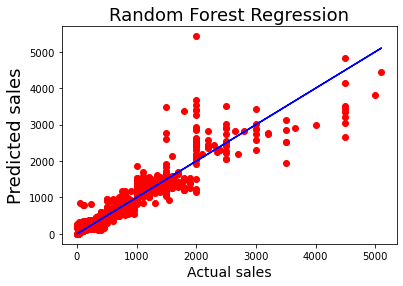

In [116]:
plt.scatter(x=Y_test, y=pred_decision, color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Random Forest Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

# Saving the best model

In [117]:
import joblib

joblib.dump(rf,'Average.obj')

Average_loadmodel=joblib.load('Average.obj')
prediction=Average_loadmodel.predict(X_test)
prediction

array([ 592. ,  590.5, 1275. , ...,  763.5,  215.4,  597.5])

In [118]:
conclusion=pd.DataFrame([Average_loadmodel.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808
Predicted,592.0,590.5,1275.0,275.25,348.5,303.0,329.5,366.5,312.5,634.5,...,676.0,855.5,222.0,1260.0,307.0,1120.5,712.5,763.5,215.4,597.5
Original,592.0,590.5,1275.0,275.25,348.5,303.0,329.5,366.5,312.5,634.5,...,676.0,855.5,222.0,1260.0,307.0,1120.5,712.5,763.5,215.4,597.5


# Classification

# Splitting data into two parts: Input and Target variable

In [130]:
x = df.drop(columns=['Price range'],axis=1)
y = df['Price range']

In [131]:
x

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,4.8,0,1,314,6
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,4.5,0,1,591,6
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4.4,1,5,270,6
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4.9,0,1,365,6
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,5926,517,28.977392,41.022793,1813,80,11,0,0,0,0,4.1,1,5,788,11
9547,1311,208,140,5962,552,29.041297,41.009847,1824,105,11,0,0,0,0,4.2,1,5,1034,11
9548,3069,208,140,5966,554,29.034640,41.055817,1110,170,11,0,0,0,0,3.7,5,2,661,11
9549,513,208,140,5967,554,29.036019,41.057979,1657,120,11,0,0,0,0,4.0,1,5,901,11


In [132]:
y

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9362, dtype: int64

In [133]:
x.shape

(9362, 19)

In [134]:
y.shape

(9362,)

# Scaling

In [135]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.046028,2.546808,-0.234817,1.608777,-1.556831,1.377696,-1.034966,-0.135805,0.896729,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.429678,-2.022410,-0.451916,0.977930,0.859957
1,-0.223104,2.546808,-0.234817,0.584353,-0.216997,1.377371,-1.036033,0.235153,1.065981,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.231562,-2.022410,-0.451916,2.321890,0.859957
2,-0.352063,2.546808,-0.148206,0.050327,-1.121862,1.378405,-1.033513,1.322778,5.805034,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.165524,-1.343779,1.932324,0.764449,0.859957
3,0.493647,2.546808,-0.148206,1.610725,0.637068,1.378396,-1.033157,0.264286,1.573737,-4.331413,-0.364131,-0.586149,-0.060373,0.0,1.495717,-2.022410,-0.451916,1.225374,0.859957
4,0.874917,2.546808,-0.148206,1.610335,0.637068,1.378421,-1.033236,0.256517,1.573737,-4.331413,2.746265,-0.586149,-0.060373,0.0,1.429678,-2.022410,-0.451916,0.565523,0.859957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,0.370294,3.360908,2.666651,0.534105,-0.458294,-0.848838,1.372615,1.598569,-0.829640,7.644251,-0.364131,-0.586149,-0.060373,0.0,0.967408,-1.343779,1.932324,3.277703,2.753221
9358,-1.093111,3.360908,2.666651,0.548128,-0.347171,-0.847293,1.371437,1.619933,-0.787327,7.644251,-0.364131,-0.586149,-0.060373,0.0,1.033446,-1.343779,1.932324,4.471256,2.753221
9359,-0.271698,3.360908,2.666651,0.549686,-0.340821,-0.847454,1.375620,0.233211,-0.677313,7.644251,-0.364131,-0.586149,-0.060373,0.0,0.703253,1.370745,0.144144,2.661519,2.753221
9360,-1.465971,3.360908,2.666651,0.550075,-0.340821,-0.847420,1.375817,1.295587,-0.761939,7.644251,-0.364131,-0.586149,-0.060373,0.0,0.901369,-1.343779,1.932324,3.825961,2.753221


# Checking VIF

In [137]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,Restaurant Name,1.007752
1,Country Code,47.203839
2,City,1.081009
3,Address,1.113230
4,Locality,1.069018
5,Longitude,5.029660
6,Latitude,3.036560
7,Cuisines,1.042189
8,Average Cost for two,1.829247
9,Currency,1.296530


In [138]:
# Dropping high Mulicollinarity column
x.drop("Country Code",axis=1,inplace=True)
x.drop("Switch to order menu",axis=1,inplace=True)
x.drop("Country",axis=1,inplace=True)

In [140]:
x.shape

(9362, 16)

# SMOTE

In [141]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [142]:
y.value_counts()

3    4437
4    4437
2    4437
1    4437
Name: Price range, dtype: int64

# Finding the best random state

In [144]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.7654460093896713  on Random_state  172


<b>Creating train_test_split</b>

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [146]:
x_train.shape

(12423, 16)

In [147]:
x_test.shape

(5325, 16)

In [148]:
y_train.shape

(12423,)

In [149]:
y_test.shape

(5325,)

# Logistic Regression

In [150]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 76.54460093896714
[[1155  152   30    9]
 [ 114  974  182   37]
 [  63  147  907  215]
 [  52   38  210 1040]]
              precision    recall  f1-score   support

           1       0.83      0.86      0.85      1346
           2       0.74      0.75      0.74      1307
           3       0.68      0.68      0.68      1332
           4       0.80      0.78      0.79      1340

    accuracy                           0.77      5325
   macro avg       0.76      0.77      0.76      5325
weighted avg       0.77      0.77      0.77      5325



In [151]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.741606673572004


# DecisionTree Classifier

In [154]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 98.15962441314554
[[1338    7    1    0]
 [   3 1282   18    4]
 [   0   13 1305   14]
 [   1    3   34 1302]]
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      1346
           2       0.98      0.98      0.98      1307
           3       0.96      0.98      0.97      1332
           4       0.99      0.97      0.98      1340

    accuracy                           0.98      5325
   macro avg       0.98      0.98      0.98      5325
weighted avg       0.98      0.98      0.98      5325



In [155]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.9373487631905834


# KNeighbors Classifier

In [157]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 84.61971830985917
[[1063  246   30    7]
 [ 207  937  144   19]
 [  12   67 1189   64]
 [   1    4   18 1317]]
              precision    recall  f1-score   support

           1       0.83      0.79      0.81      1346
           2       0.75      0.72      0.73      1307
           3       0.86      0.89      0.88      1332
           4       0.94      0.98      0.96      1340

    accuracy                           0.85      5325
   macro avg       0.84      0.85      0.84      5325
weighted avg       0.84      0.85      0.84      5325



In [158]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.8111393092281499


# Support Vector Classifier

In [159]:
sv=SVC()
sv.fit(x_train, y_train)
predsv=sv.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuaracy 92.69483568075117
[[1259   63   20    4]
 [  21 1192   82   12]
 [   1   50 1217   64]
 [   0   11   61 1268]]
              precision    recall  f1-score   support

           1       0.98      0.94      0.96      1346
           2       0.91      0.91      0.91      1307
           3       0.88      0.91      0.90      1332
           4       0.94      0.95      0.94      1340

    accuracy                           0.93      5325
   macro avg       0.93      0.93      0.93      5325
weighted avg       0.93      0.93      0.93      5325



In [160]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr.mean())

Cross validation score of Support Vector Classifier model: 0.9061328761523779


# Ensemble Technique

In [161]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 98.68544600938968
[[1337    7    2    0]
 [   6 1278   21    2]
 [   0    7 1320    5]
 [   0    0   20 1320]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1346
           2       0.99      0.98      0.98      1307
           3       0.97      0.99      0.98      1332
           4       0.99      0.99      0.99      1340

    accuracy                           0.99      5325
   macro avg       0.99      0.99      0.99      5325
weighted avg       0.99      0.99      0.99      5325



In [162]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.9592652086086539


In [164]:
RandomForestClassifier()

RandomForestClassifier()

In [165]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [166]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [169]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [170]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [171]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [172]:
RandomForestClassifier()

RandomForestClassifier()

In [173]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [174]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9654460093896714

# Saving the best model

In [175]:
import joblib

joblib.dump(rf,'Price.obj')

Price_loadmodel=joblib.load('Price.obj')
Price_loadmodel.predict(x_test)

array([2, 3, 4, ..., 3, 4, 1], dtype=int64)

In [176]:
conclusion=pd.DataFrame([Price_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324
Predicted,2,3,4,3,4,2,1,1,4,2,...,3,4,3,2,3,4,3,3,4,1
Original,2,3,4,3,4,2,1,1,4,2,...,3,4,3,2,3,4,3,3,4,1
